<a href="https://colab.research.google.com/github/muu86/golf_prj/blob/main/swing_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd drive/MyDrive/Colab\ Notebooks/golfdb

/content/drive/MyDrive/Colab Notebooks/golfdb


In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## event name

- 0 : Address
- 1 : Toe-up
- 2 : Mid-backswing
- 3 : Top
- 4 : Mid-downswing
- 5 : Impact
- 6 : Mid-follow-through
- 7 : Finish

In [3]:
df = pd.read_pickle('data/face_on.pkl')

In [4]:
df

,id,youtube_id,player,sex,club,view,slow,events,bbox,split
8,8,-M5SITXMA2Y,CRISTIE KERR,f,driver,face-on,0,"[288, 317, 333, 335, 347, 352, 355, 357, 371, ...","[0.0007812500000000111, 0.0006944444444444445,...",4
10,10,gOBVh7fzyZo,STEVE STRICKER,m,driver,face-on,0,"[395, 475, 488, 492, 499, 504, 507, 509, 524, ...","[0.10625, 0.0006944444444444445, 0.80078125, 1.0]",1
14,14,vN3Uc_EhnnY,GREG NORMAN,m,driver,face-on,0,"[457, 497, 513, 515, 523, 527, 531, 533, 546, ...","[0.05234375000000001, 0.0006944444444444445, 0...",2
19,19,iW323nsTGtU,HYO JOO KIM,f,driver,face-on,0,"[271, 310, 328, 333, 344, 348, 352, 355, 377, ...","[0.07343750000000002, 0.0006944444444444445, 0...",3
25,25,pxO_eGmiDFk,PORNANONG PHATLUM,f,driver,face-on,0,"[301, 338, 362, 370, 379, 383, 387, 389, 407, ...","[0.05625000000000001, 0.0006944444444444445, 0...",3
...,...,...,...,...,...,...,...,...,...,...
1348,1348,Yigxi0Oc5V4,BEN ROETHLISBERGER,m,driver,face-on,0,"[331, 566, 581, 586, 594, 600, 603, 605, 620, ...","[0.06640625000000001, 0.0006944444444444445, 0...",2
1352,1352,9Ifs0EQmRZk,BEATRIZ RECARI,f,driver,face-on,0,"[271, 465, 482, 487, 494, 497, 501, 504, 523, ...","[0.06250000000000001, 0.0006944444444444445, 0...",2
1374,1374,6K1FD0sOwoI,ALISON LEE,f,driver,face-on,0,"[151, 420, 444, 451, 459, 464, 468, 471, 491, ...","[0.140625, 0.0006944444444444445, 0.7171875, 0...",2
1388,1388,GXn3A0IuWsE,ROGER CLEMENS,m,driver,face-on,0,"[211, 255, 265, 270, 276, 280, 284, 286, 297, ...","[0.12109375, 0.09583333333333334, 0.65703125, ...",1


In [26]:
kp = pd.read_pickle('data/keypoints_dic.pickle')

In [27]:
kp

{8: {0: [[0.459633, 0.310204],
   [0.454289, 0.342865],
   [0.416227, 0.350986],
   [0.424228, 0.421646],
   [0.454242, 0.470582],
   [0.494997, 0.340159],
   [0.50312, 0.405392],
   [0.492362, 0.467728],
   [0.45694, 0.467886],
   [0.427064, 0.470503],
   [0.402662, 0.579136],
   [0.361977, 0.68783],
   [0.48948, 0.467831],
   [0.513959, 0.576581],
   [0.535735, 0.685227],
   [0.448723, 0.296759],
   [0.467693, 0.29663],
   [0.432466, 0.30206],
   [0.4733, 0.296662],
   [0.543917, 0.706968],
   [0.55747, 0.70417],
   [0.53034, 0.696083],
   [0.3591, 0.709558],
   [0.340159, 0.704171],
   [0.367277, 0.696059]],
  1: [[0.448753, 0.299354],
   [0.445995, 0.350932],
   [0.408098, 0.342857],
   [0.383541, 0.399881],
   [0.334715, 0.41617],
   [0.473218, 0.356386],
   [0.484083, 0.421606],
   [0.497689, 0.467814],
   [0.44871, 0.486766],
   [0.421561, 0.486768],
   [0.397209, 0.584692],
   [0.364612, 0.687922],
   [0.478666, 0.484104],
   [0.505908, 0.58193],
   [0.533082, 0.685272],
   [0.

## 3번 Top 자세

### 왼팔의 구부러짐
openpose keypoints
오른팔 5, 6, 7
왼팔  2, 3, 4

https://www.golfdistillery.com/swing-thoughts/backswing/keep-left-arm-straight/

손을 몸에서 가장 멀리 밀면 스윙하는 동안 손이 가장 먼 거리를 이동하게 된다.
또한, 왼팔이 구부러지지 않게 하면 샷의 일관성과 신뢰성이 향상된다.
유연성이 좋지 않거나 고령의 골퍼의 경우 팔꿈치를 약간 구부리는 것으로 거리를 조금 더 낼 수 있으므로 약간의 구부러짐은 허용된다.

어깨, 팔꿈치, 손목 3개의 좌표의 각도를 비교한다.
5번, 6번, 7번
https://manivannan-ai.medium.com/find-the-angle-between-three-points-from-2d-using-python-348c513e2cd


In [31]:
# 키 포인트를 담을 df
left_arm_kp = pd.DataFrame()

In [40]:
def p3_angle(a, b, c):
  ba = a - b
  bc = c - b

  cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
  angle = np.arccos(cosine_angle)

  return np.degrees(angle)

In [42]:
for id, points in kp.items():
  # print(id)
  p = points[3] # top 자세에서 모든 관절 keypoints
  # print(p[5]) # top 자세에서 5번 관절(왼쪽 어깨)

  left_arm_kp.loc[id, '5x'] = p[5][0] # x 좌표
  left_arm_kp.loc[id, '5y'] = p[5][1] # y 좌표

  left_arm_kp.loc[id, '6x'] = p[6][0] # x 좌표
  left_arm_kp.loc[id, '6y'] = p[6][1] # y 좌표

  left_arm_kp.loc[id, '7x'] = p[7][0] # x 좌표
  left_arm_kp.loc[id, '7y'] = p[7][1] # y 좌표

  angle = p3_angle(np.array(p[5]), np.array(p[6]), np.array(p[7]))
  left_arm_kp.loc[id, 'angle'] = angle # 3 점 사이 각도

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [ ]:
for i in left_arm_kp['angle']:
  print(i)

In [47]:
left_arm_kp['angle'].isnull().value_counts()

False    167
True       7
Name: angle, dtype: int64

(array([ 3.,  9., 11., 15., 22., 21., 32., 22., 16., 16.]),
 array([  3.79550813,  21.22401984,  38.65253155,  56.08104326,
         73.50955497,  90.93806668, 108.36657839, 125.79509011,
        143.22360182, 160.65211353, 178.08062524]),
 <a list of 10 Patch objects>)

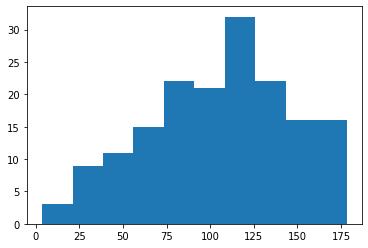

In [50]:
plt.hist(left_arm_kp['angle'])

In [61]:
left_arm_kp.loc[left_arm_kp['angle'] < 50]

,5x,5y,6x,6y,7x,7y,angle
19,0.489608,0.402498,0.489616,0.454212,0.448864,0.416226,47.003062
231,0.541196,0.402547,0.562903,0.440664,0.000000,0.000000,22.283879
248,0.500429,0.340054,0.516724,0.383610,0.000000,0.000000,32.898597
273,0.530321,0.402625,0.535805,0.448791,0.511325,0.383624,13.814354
287,0.500429,0.359096,0.514015,0.416205,0.486805,0.394449,37.973911
408,0.489550,0.399896,0.500425,0.462372,0.000000,0.000000,37.388985
440,0.516763,0.367344,0.514116,0.424362,0.492175,0.378176,28.068388
492,0.492413,0.389066,0.495063,0.448713,0.000000,0.000000,45.267740
551,0.513989,0.408116,0.511247,0.421550,0.486872,0.389057,48.411947
789,0.476033,0.421588,0.478724,0.503185,0.443391,0.432542,24.683631


각도가 비정상적으로 작은 경우
openpose 좌표가 문제인 경우이다.
사진으로 확인해보면 제대로 된 관절 좌표가 찍히지 않았다.
백스윙 시에는 몸이 최대로 회전해 왼쪽 어깨가 오른쪽으로, 오른쪽 어깨가 왼쪽으로 돌아가므로 오픈포즈가 왼 어깨를 오른 어깨로 인식하는 등 오류가 발생

현재 비디오는 화질이 낮아서 고화질의 비디오를 오픈 포즈에 넣었을 때 오류가 줄어드는 지 체크해봐야한다.

In [52]:
left_arm_kp.loc[left_arm_kp['angle'] > 150]

,5x,5y,6x,6y,7x,7y,angle
10,0.475977,0.410752,0.492200,0.473279,0.503163,0.505840,175.937089
74,0.511299,0.337486,0.489532,0.329219,0.000000,0.000000,166.874997
127,0.427062,0.383555,0.402697,0.340020,0.402657,0.296542,150.818516
150,0.495038,0.361882,0.497668,0.315675,0.505882,0.274907,171.866103
276,0.486887,0.321061,0.443388,0.310166,0.000000,0.000000,159.087159
277,0.465030,0.356400,0.435238,0.299309,0.426967,0.231508,159.398046
297,0.541190,0.413521,0.533088,0.388997,0.527559,0.353699,170.620328
328,0.492362,0.402533,0.470538,0.364616,0.437917,0.340081,156.871229
392,0.535703,0.378133,0.514004,0.369964,0.473288,0.326516,153.770605
462,0.543884,0.359191,0.532989,0.340184,0.530304,0.315714,156.440037


내 컴퓨터
타이거 우즈 스윙 18번 프레임 json data

In [54]:
json_data = json.loads('{"version":1.3,"people":[{"person_id":[-1],"pose_keypoints_2d":[0.434974,0.371288,0.0769262,0.52476,0.384899,0.82251,0.579512,0.357585,0.812163,0.390154,0.352164,0.593965,0.330234,0.284135,0.803583,0.459995,0.420327,0.696041,0.315379,0.354972,0.807621,0.260623,0.275955,0.86756,0.52474,0.575699,0.707395,0.454727,0.572929,0.731835,0.380369,0.714585,0.80882,0.340302,0.897208,0.827612,0.59444,0.578433,0.660975,0.634364,0.747351,0.85507,0.679233,0.902498,0.782383,0,0,0,0,0,0,0.53458,0.335913,0.129549,0.499867,0.354901,0.234052,0.7091,0.927299,0.766319,0.739061,0.924458,0.859522,0.654435,0.918903,0.747228,0.320325,0.924494,0.815672,0.295219,0.921656,0.833836,0.355292,0.910801,0.724305],"face_keypoints_2d":[],"hand_left_keypoints_2d":[],"hand_right_keypoints_2d":[],"pose_keypoints_3d":[],"face_keypoints_3d":[],"hand_left_keypoints_3d":[],"hand_right_keypoints_3d":[]}]}')

In [58]:
woods_18_kp = json_data['people'][0]['pose_keypoints_2d']

In [59]:
woods_5 = np.array([woods_18_kp[3 * 5 + 0],
                   woods_18_kp[3 * 5 + 1]])
woods_6 = np.array([woods_18_kp[3 * 6 + 0],
                   woods_18_kp[3 * 6 + 1]])
woods_7 = np.array([woods_18_kp[3 * 7 + 0],
                   woods_18_kp[3 * 7 + 1]])

In [60]:
p3_angle(woods_5, woods_6, woods_7)

149.03980434102647

### 공을 향해 왼쪽 무릎 이동

백스윙 중에 왼쪽 무릎이 공을 향해 약간 아래쪽으로 움직이는 것
체중이동에 도움이 된다.

reverse pivot
백스윙 중에는 앞발로, 다운 스윙 중에는 뒷발로 체중이 이동하는 것
https://www.golfdistillery.com/swing-errors/reverse-pivot/

## 4번 Mid-downswing 자세

## 5번 Impact 자세

### 리버스 피벗
https://www.golfdistillery.com/swing-errors/reverse-pivot/

리버스 피벗이란 정상적인 체중 이동과는 반대로 체중 이동하는 것을 말하는 것
백스윙 시에 왼발로, 다운스윙 시에 오른발로 체중이동하는 것

정상적인 스윙
어드레스 : 양 발에 동등하게 무게 중심
백스윙 : 뒷발(오른발)에 무게 중심
다운스윙 : 앞발(왼발)에 무게 중심
팔로우 스루 : 모든 무게 중심을 앞발로

반대로 된 체중이동은 공에 임팩트 시 제대로 된 힘을 전달할 수 없다.

임팩트 시에 무게 중심이 뒷 발에 있는 골퍼의 경우
스윙 궤도가 볼의 뒤에 있게 되므로
헤드가 볼의 윗 부분을 때리게 되는 thin shot 이 나오게 된다.

임팩트 시 왼쪽 어깨가 왼발과 같은 라인을 이루는 것이 좋은 샷이라고 가정
(상체가 오른쪽으로 약간 이동한 상태)
왼쪽 어깨 x좌표가 왼쪽 발 x좌표에서 많이 떨어졌는 가를 체크한다



In [63]:
# 넘파이 좌표의 차를 리턴하는 함수
def compare_points(a, b):
  a = np.array(a)
  b = np.array(b)
  return a - b

In [70]:
kp_ = pd.DataFrame()

In [75]:
for id, points in kp.items():
  p = points[5]
  
  kp_.loc[id, '5x'] = p[5][0]   # 왼 어깨
  kp_.loc[id, '5y'] = p[5][1]

  kp_.loc[id, '14x'] = p[14][0]   # 왼 발목
  kp_.loc[id, '14y'] = p[14][1]

  kp_.loc[id, 'x_diff'] = compare_points(p[5], p[14])[0]

In [76]:
kp_

,5x,5y,14x,14y,x_diff
8,0.478676,0.315695,0.541175,0.685239,-0.062499
10,0.508586,0.397168,0.552081,0.774882,-0.043495
14,0.522180,0.378069,0.552100,0.758580,-0.029920
19,0.533033,0.389083,0.576478,0.728566,-0.043445
25,0.508615,0.361980,0.573769,0.723250,-0.065154
...,...,...,...,...,...
1348,0.557573,0.405279,0.590101,0.793927,-0.032528
1352,0.530295,0.413501,0.557592,0.728633,-0.027297
1374,0.516687,0.364513,0.560217,0.750329,-0.043530
1388,0.560192,0.380786,0.600870,0.788506,-0.040678


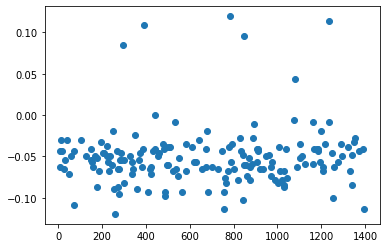

In [79]:
plt.scatter(kp_.index, kp_['x_diff'])

In [80]:
kp_['x_diff'].max()

0.11950900000000003

In [81]:
kp_['x_diff'].min()

-0.11948600000000004

발목 좌표 - 어깨 좌표 대부분이 마이너스 결과
왼쪽 어깨가 왼쪽 발목보다 더 왼쪽

(array([ 7., 25., 75., 52.,  9.,  0.,  1.,  0.,  2.,  3.]),
 array([-1.19486e-01, -9.55865e-02, -7.16870e-02, -4.77875e-02,
        -2.38880e-02,  1.15000e-05,  2.39110e-02,  4.78105e-02,
         7.17100e-02,  9.56095e-02,  1.19509e-01]),
 <a list of 10 Patch objects>)

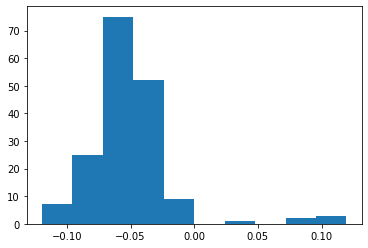

In [82]:
plt.hist(kp_['x_diff'])